Matthew Dacre 2091295

In [1]:
import numpy as np
from skimage.exposure import match_histograms
from skimage.io import imread, imshow
from matplotlib import pyplot as plt
import cv2
from scipy import signal, stats


## Question 1.1

In order to match the histograms, the averages of the K convolutions are stored in q. At a pixel $x, y$, `q(x,y) = [k0..k6]`, if k = 6. It is then reshaped into an $(M \cdot N) \times K$ matrix, in order to be lexicographically sorted. The indeces of this lexicographic sorting are stored in `O`, where `O` is an $(M \cdot N) \times 1$ matrix, containing the ordered indices. The next step is to calculate the histogram of `im_target`, done using `np.bincount`, with `bins=256` to match the total intensity levels in the greyscale input image. Then, based on the bins obtained earlier, the pixels `O[start:end]` are given the `ith intensity value. This is then reshaped into the original images shape and returned. 

In [2]:
def exact_histogram_matching(im, im_target, K):

    '''
    Matches the histogram between im and im_target, using K filters.
    '''

    # Ensuring K <= 6
    if K > 6: K = 6

    # Setting up averaging filters w1 to w6, and storing in array filters
    w1 = np.array([[1]])
    t = 1/5
    w2 = t * np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    t = 1/9
    w3 = t * np.ones((3, 3))
    t = 1/13
    w4 = t * np.array([[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]])
    t = 1/21
    w5 = t * np.array([[0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0]])
    t = 1/25
    w6 = t * np.ones((5,5))
    filters = np.array([w1, w2, w3, w4, w5, w6], dtype=object)

    # Initialising q
    q = np.zeros((im.shape[0], im.shape[1], K))

    # Runing convolution for each filter and storing in q
    for i in range(K):
        imc = signal.convolve2d(im, filters[i], mode="same")
        q[:, :, i] = imc

    #Reshaping q into NM by K
    q = q.reshape((im.shape[0]*im.shape[1], K))
    # Sorting lexographically into O
    O = np.lexsort(np.transpose(q)[:: -1])

    # Getting bin counts from the target image
    bins = np.bincount(np.reshape(im_target, im_target.shape[0] * im_target.shape[1]))
    im_out = np.zeros((q.shape[0], 1))

    # Assigning intensity values for pixels in output image
    count = 0
    for i in range(len(bins)):
        # Assigning intensity level i for the pixels determined by O
        im_out[O[count:count+bins[i]]] = i
        count += bins[i]

    # Reshaping output image into origional shape
    im_out = np.reshape(im_out, im.shape)

    return im_out
    

### Question 1.1.1

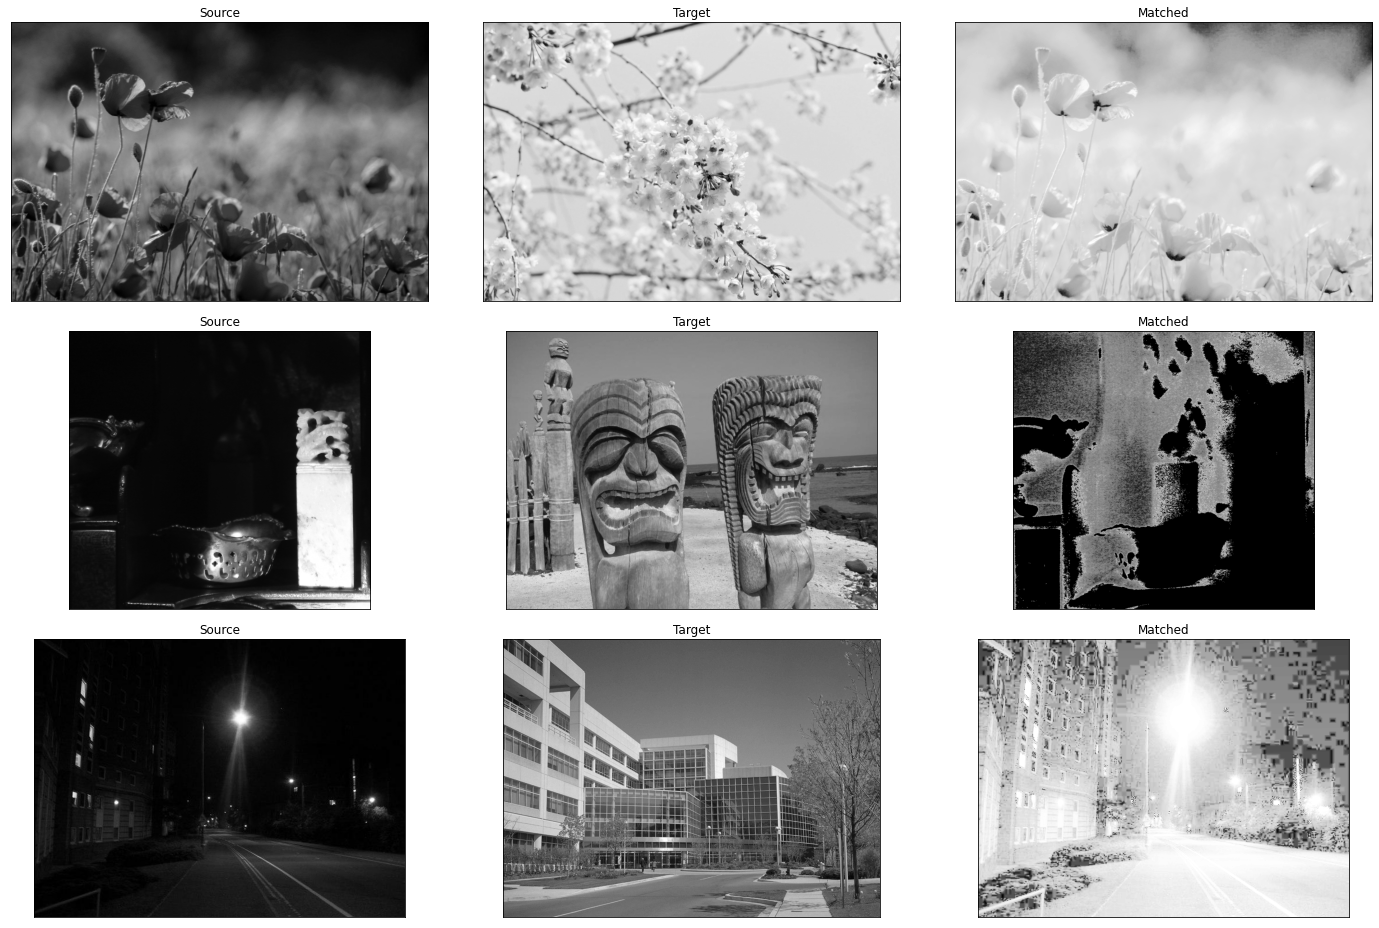

In [3]:
# Reading in images

imPoppies = imread("images/poppies.png", as_gray=True)
imPoppiesTarget = imread("images/cherry_tree.png")

imHiddenHorse = imread("images/hidden-horse.tif", as_gray=True)
imHiddenHorseTarget = imread("images/totem-poles.tif")

imRoad = imread("images/road_low_2.jpg", as_gray=True)
imRoadTarget = imread("images/national-archives-bld.tif", as_gray=True)

fig, axs = plt.subplots(3, 3, figsize=(20, 13))


# Setting axes details
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Target")
axs[0, 2].set_title("Matched")
axs[0, 0].imshow(imPoppies, cmap="gray")
axs[0, 1].imshow(imPoppiesTarget, cmap="gray")
axs[0, 2].imshow(exact_histogram_matching(imPoppies, imPoppiesTarget, 6), cmap="gray")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[1, 0].set_title("Source")
axs[1, 1].set_title("Target")
axs[1, 2].set_title("Matched")
axs[1, 0].imshow(imHiddenHorse, cmap="gray")
axs[1, 1].imshow(imHiddenHorseTarget, cmap="gray")
axs[1, 2].imshow(exact_histogram_matching(imHiddenHorse, imHiddenHorseTarget, 6), cmap="gray")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[2, 0].set_title("Source")
axs[2, 1].set_title("Target")
axs[2, 2].set_title("Matched")
axs[2, 0].imshow(imRoad, cmap="gray")
axs[2, 1].imshow(imRoadTarget, cmap="gray")
axs[2, 2].imshow(exact_histogram_matching(imRoad, imRoadTarget, 6), cmap="gray")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])


fig.set_facecolor("white")
fig.tight_layout()
plt.show()

Performing the same actions, but using `skimage.exposure.match_histograms`

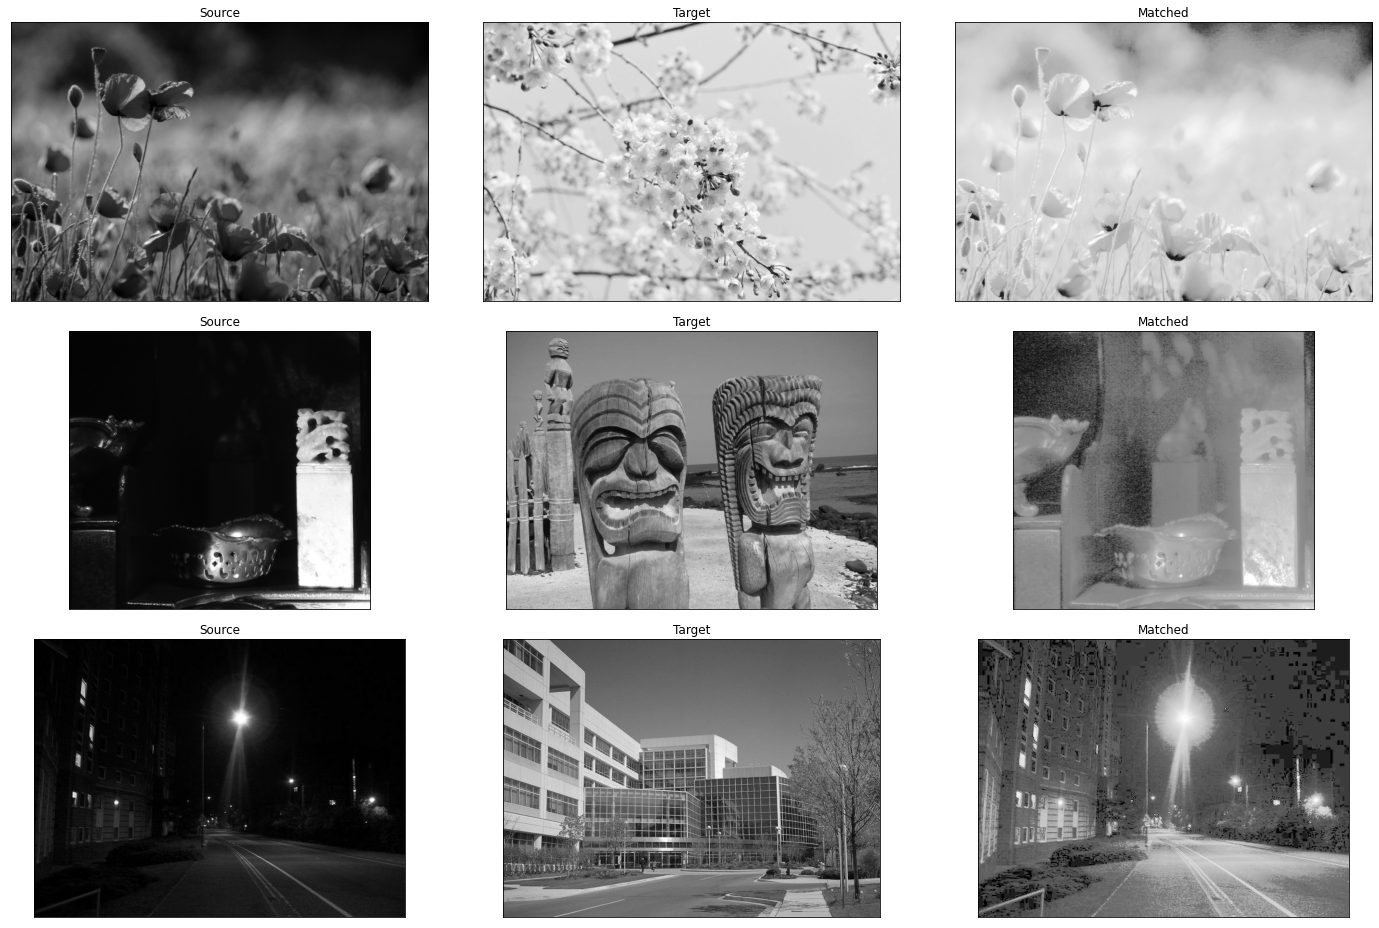

In [4]:
imPoppies = imread("images/poppies.png", as_gray=True)
imPoppiesTarget = imread("images/cherry_tree.png")

imHiddenHorse = imread("images/hidden-horse.tif", as_gray=True)
imHiddenHorseTarget = imread("images/totem-poles.tif")

imRoad = imread("images/road_low_2.jpg", as_gray=True)
imRoadTarget = imread("images/national-archives-bld.tif", as_gray=True)

fig, axs = plt.subplots(3, 3, figsize=(20, 13))


# Setting axes details
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Target")
axs[0, 2].set_title("Matched")
axs[0, 0].imshow(imPoppies, cmap="gray")
axs[0, 1].imshow(imPoppiesTarget, cmap="gray")
axs[0, 2].imshow(match_histograms(imPoppies, imPoppiesTarget), cmap="gray")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[1, 0].set_title("Source")
axs[1, 1].set_title("Target")
axs[1, 2].set_title("Matched")
axs[1, 0].imshow(imHiddenHorse, cmap="gray")
axs[1, 1].imshow(imHiddenHorseTarget, cmap="gray")
axs[1, 2].imshow(match_histograms(imHiddenHorse, imHiddenHorseTarget), cmap="gray")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[2, 0].set_title("Source")
axs[2, 1].set_title("Target")
axs[2, 2].set_title("Matched")
axs[2, 0].imshow(imRoad, cmap="gray")
axs[2, 1].imshow(imRoadTarget, cmap="gray")
axs[2, 2].imshow(match_histograms(imRoad, imRoadTarget), cmap="gray")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])


fig.set_facecolor("white")
fig.tight_layout()
plt.show()

### Question 1.1.2

The image `poppies.png` has a histogram that peaks at a much lower intensity level than `cherry_tree.png`. By performing exact histogram matching between these two images, you would expect the output image to be much brighter, even partially over exposed. 

The graphs shown below that the matched image's histogram matches the histogram of `cherry_tree.png` very well, which is expected from exact histogram matching.

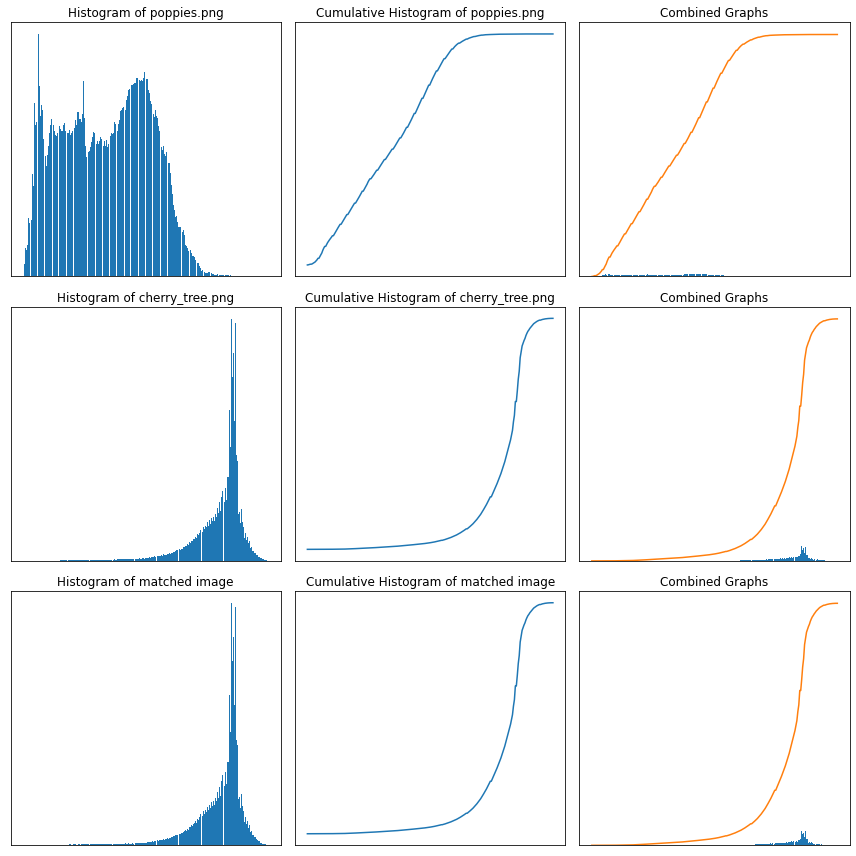

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

#Getting images for analysis
imPoppies = imread("images/poppies.png", as_gray=True)
imPoppiesTarget = imread("images/cherry_tree.png", as_gray=True)
imMatched = exact_histogram_matching(imPoppies, imPoppiesTarget, 6)

#Plotting each images histograms
axs[0, 0].hist(np.reshape(imPoppies, imPoppies.shape[0] * imPoppies.shape[1]), bins=256)
axs[0, 0].set_title("Histogram of poppies.png")
cumPoppies = stats.cumfreq(np.reshape(imPoppies, imPoppies.shape[0] * imPoppies.shape[1]), numbins=256).cumcount
axs[0, 1].plot(cumPoppies)
axs[0, 1].set_title("Cumulative Histogram of poppies.png")
axs[0, 2].hist(np.reshape(imPoppies, imPoppies.shape[0] * imPoppies.shape[1]), bins=256)
axs[0,2].plot(cumPoppies)
axs[0, 2].set_title("Combined Graphs")

axs[1, 0].hist(np.reshape(imPoppiesTarget, imPoppiesTarget.shape[0] * imPoppiesTarget.shape[1]), bins=256)
axs[1, 0].set_title("Histogram of cherry_tree.png")
cumPoppiesTarget = stats.cumfreq(np.reshape(imPoppiesTarget, imPoppiesTarget.shape[0] * imPoppiesTarget.shape[1]), numbins=256).cumcount
axs[1, 1].plot(cumPoppiesTarget)
axs[1, 1].set_title("Cumulative Histogram of cherry_tree.png")
axs[1, 2].hist(np.reshape(imPoppiesTarget, imPoppiesTarget.shape[0] * imPoppiesTarget.shape[1]), bins=256)
axs[1,2].plot(cumPoppiesTarget)
axs[1, 2].set_title("Combined Graphs")

axs[2, 0].hist(np.reshape(imMatched, imMatched.shape[0] * imMatched.shape[1]), bins=256)
axs[2, 0].set_title("Histogram of matched image")
cumMatched = stats.cumfreq(np.reshape(imMatched, imMatched.shape[0] * imMatched.shape[1]), numbins=256).cumcount
axs[2, 1].plot(cumMatched)
axs[2, 1].set_title("Cumulative Histogram of matched image")
axs[2, 2].hist(np.reshape(imMatched, imMatched.shape[0] * imMatched.shape[1]), bins=256)
axs[2,2].plot(cumMatched)
axs[2, 2].set_title("Combined Graphs")


# Removing axes
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])


fig.set_facecolor("white")
fig.tight_layout()
plt.show()

## Question 2.1

First, the discrete fourier transform of the input image is calculated and shifted. The mask is then calculated, based on a pixels distance from the center of the image, and applied to the image. The image is then shifted back and the inverse fourier transform is calculated and returned.

C:\Users\Matthew Dacre\AppData\Local\Temp\ipykernel_17228\3139859957.py:27: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1+(dw/den)**(2*n))


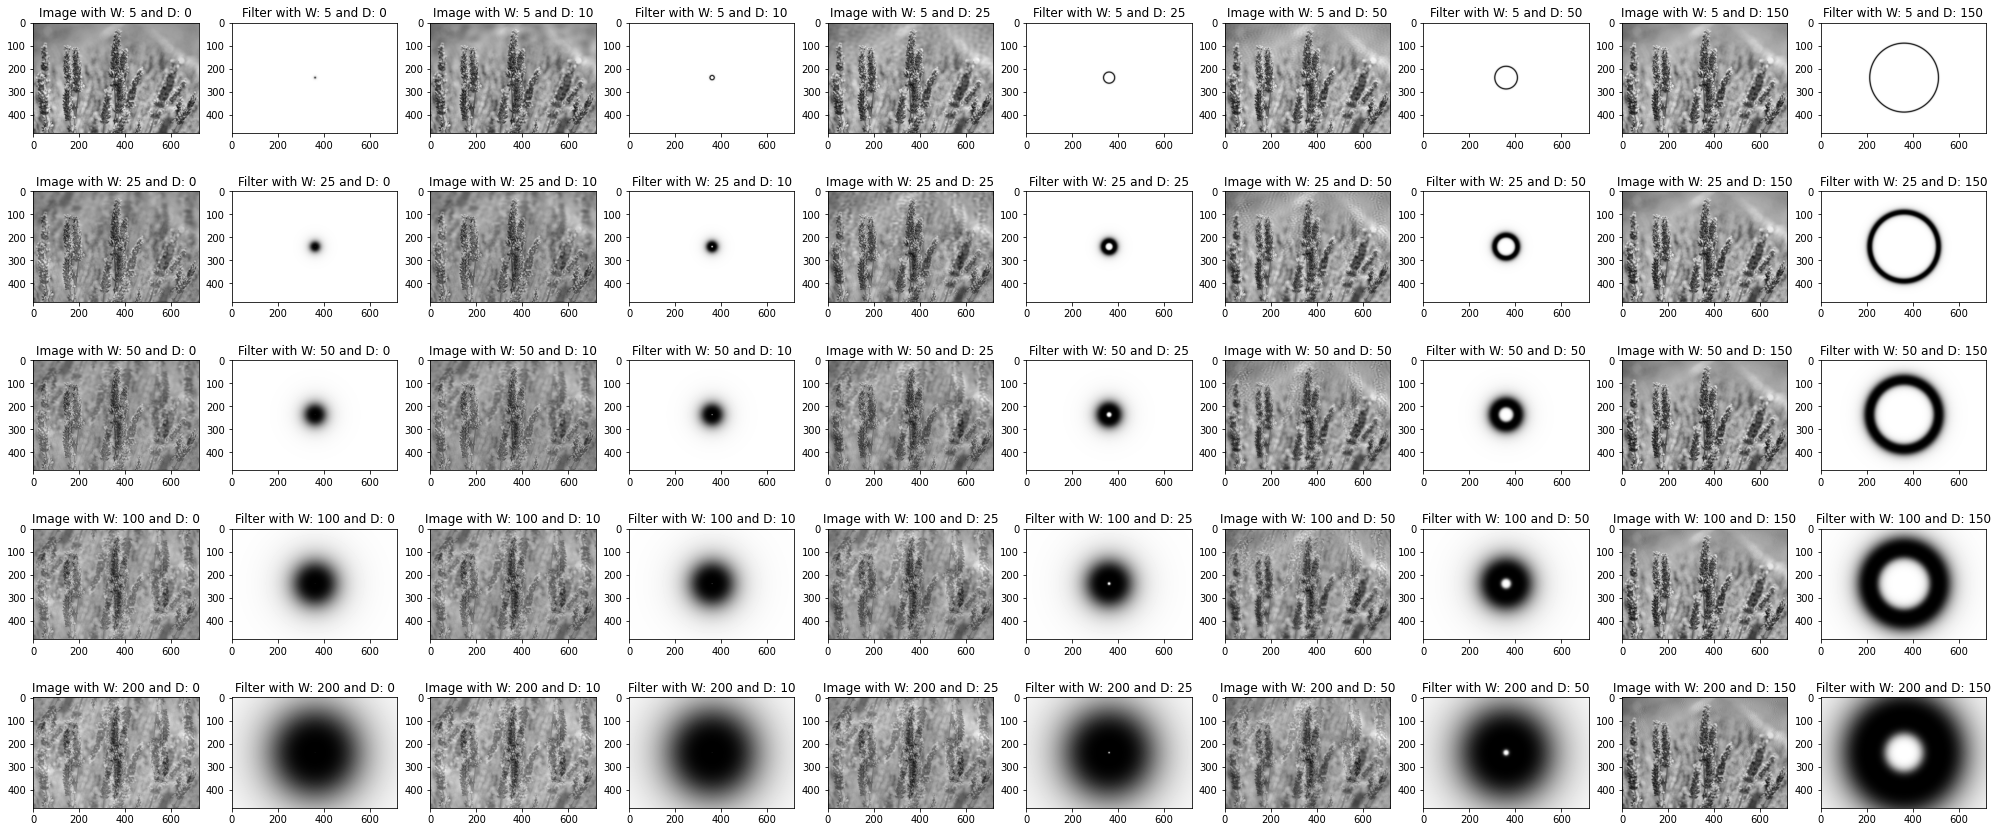

In [6]:
def D(im):
    '''
    Returns array of distances from center of frequency rectangle to point (x, y)
    '''
    u = np.arange(im.shape[0])
    v = np.arange(im.shape[1])

    idx = np.where(u>len(u)/2)
    idy = np.where(v>len(v)/2)
    u[idx] = u[idx]-len(u)
    v[idy] = v[idy]-len(v)

    V,U = np.meshgrid(v, u)
    d = np.sqrt(V**2 + U**2)
    return d


def H(im, d0, w):
    '''
    Returns the butterworth filter fora  given D_0 and W
    '''
    n = 2
    #Fetching the distance matrix and computing the values
    d = D(im)
    dw = d*w
    den = (d+1)**2 - d0**2
    return 1/(1+(dw/den)**(2*n))


def Filter(im, W, D):
    # Obtaining the fourier transform of im and shifting it
    dft = cv2.dft(np.float32(im),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Obtaining the mask and shifting it
    mask = H(im, D, W)
    mask = np.fft.fftshift(mask)
    #Transforming the mask to the appropriate shape
    rows, cols = im.shape
    maskTemp = np.ones((rows, cols, 2))
    maskTemp[:, :, 0] = mask

    # Applying the mask
    fshift = dft_shift*maskTemp
    #Shifting and returning the masked image, as well as the mask used
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back, mask

# Reading in the image and defining the D_0 and W values
im = imread("images/lavender.png", as_gray=True)
d = [0, 10, 25, 50, 150]
w = [5, 25, 50, 100, 200]
# Setting up plotting axes
fig, ax = plt.subplots(nrows=5, ncols=10)

# Running through all combinations of D_0 and W
for row, wi in enumerate(w):
    col = 0
    for n, di in enumerate(d):
        # Getting filtered image and filter used
        img, filter = Filter(im, wi, di)

        #Plotting image result and filter used
        ax[row, col].imshow(img, cmap="gray")
        ax[row, col].set_title("Image with W: " + str(wi) + " and D: " + str(di))
        col += 1
        ax[row, col].imshow(filter, cmap="gray")
        ax[row, col].set_title("Filter with W: " + str(wi) + " and D: " + str(di))
        col += 1

fig.set_figheight(15)
fig.set_figwidth(35)
plt.show()

## Question 2.2

C:\Users\Matthew Dacre\AppData\Roaming\Python\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


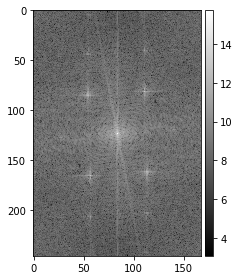

In [7]:
def fourier(im):
    ''' 
    Returns the fourier transform of im
    '''
    dft = cv2.dft(np.float32(im),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    return np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


img = imread("images/car_75DPI_Moire.tif")
#Displaying the fourier transform of car_75DPI_Moire.tif
imshow(fourier(img), cmap="gray")